In [12]:
#data : https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition-

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544) 
  
# data (as pandas dataframes) 
data = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features 
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets 
  
# metadata 
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.metadata) 
  
# variable information 
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables) 


{'uci_id': 544, 'name': 'Estimation of Obesity Levels Based On Eating Habits and Physical Condition ', 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition', 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv', 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2111, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': ['Gender', 'Age'], 'target_col': ['NObeyesdad'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Tue Sep 10 2024', 'dataset_doi': '10.24432/C5H31Z', 'creators': [], 'intro_paper': {'ID': 358, 'type': 

In [13]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# load the data
data 
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


In [16]:
data_encoded = pd.get_dummies(data, columns=["Gender", "CAEC", "CALC", "MTRANS","family_history_with_overweight","SMOKE"], drop_first=True,dtype=int)

data_encoded.drop( columns =['family_history_with_overweight_yes','SMOKE_yes','FAVC','SCC','CALC_no','CAEC_Sometimes', 'CAEC_no', 'CALC_Frequently', 'MTRANS_Motorbike','MTRANS_Public_Transportation', 'MTRANS_Walking','CAEC_Frequently','CALC_Sometimes',  'MTRANS_Bike'], axis=1, inplace=True)
data_encoded.head()


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,1
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,1
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,1


In [17]:
# rename the colonne Gender_male tu Gender
data_encoded.rename(columns={'Gender_Male':"Gender"}, inplace=True)
data_encoded.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,1
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,1
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,1


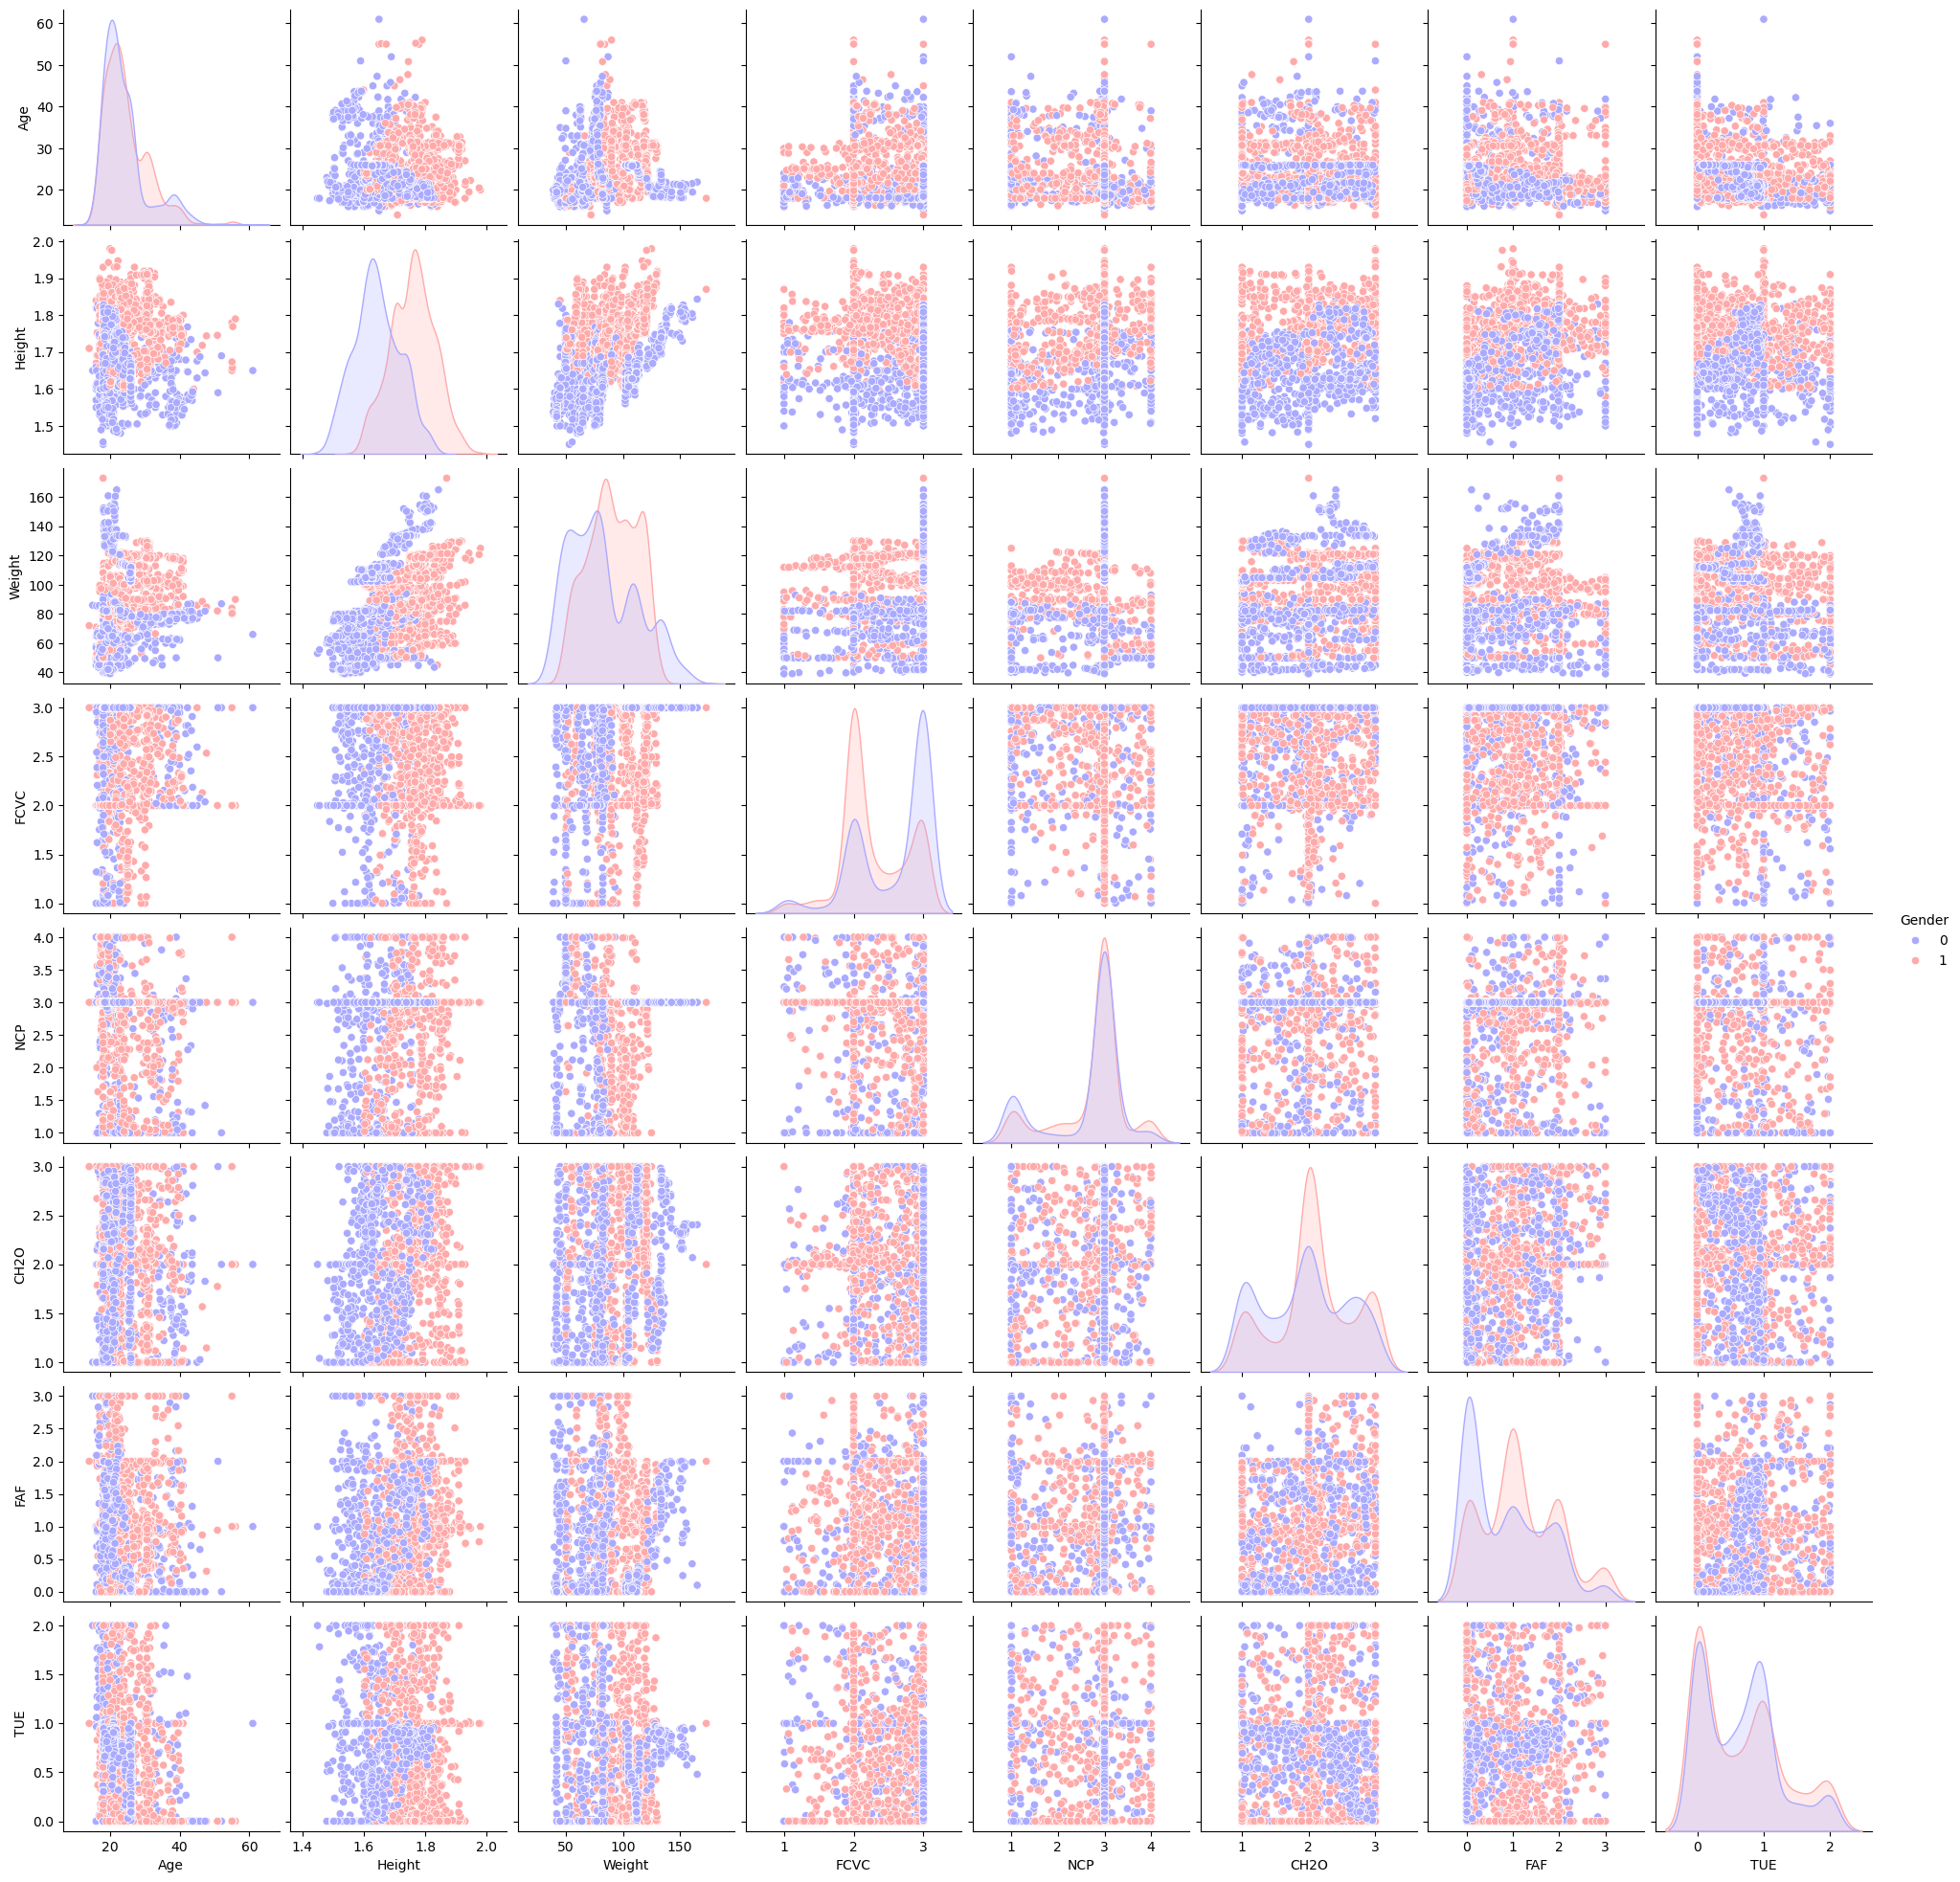

In [18]:
# Pairplot of the data based on the gender
sns.pairplot(data_encoded,hue='Gender',palette='bwr')

In [ ]:
#Height	
# Weight
#Age	
#FAF : Physical activity frequency
#TUE : Time using technology devices
#FCVC : Frequency of consumption of vegetables
#NCP : Number of main meals
#CH2O : Consumption of water daily

In [20]:
# Splitting the dataset into the Training set and Test set 


from sklearn.model_selection import train_test_split
X = data_encoded.drop(columns = ['Gender'], axis=1).values
y = data_encoded["Gender"].values

# why scaling is important?
# because the range of values of raw data varies widely
# so, the range of all features should be standardized so that each feature contributes approximately proportionately to the final distance

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_encoded_scaled = pd.DataFrame(scaler.fit_transform(X), columns = data_encoded.columns[:-1])

X_train, X_test, y_train, y_test = train_test_split(data_encoded_scaled, y, test_size = 0.2, random_state = 0)
data_encoded_scaled.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997
1,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625
2,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997
3,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625
4,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625


In [21]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape
# what is X_train ?  X-train is the training data
# what is X_test ? X-test is the test data 
# what is y_train ? y-train is the training data and it is the target variable
# what is y_test ? y-test is the test data and it is the target variable


((2111, 8), (2111,), (1688, 8), (423, 8), (1688,), (423,))

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a Logistic Regression model
# why solver and max_iterations? solver is the algorithm to use in the optimization problem and max_iterations is the maximum number of iterations taken for the solvers to converge
log_reg = LogisticRegression(solver='liblinear',max_iter=500)

# Train the model
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=500, solver='liblinear')

In [23]:
# Make predictions on the test set
y_pred = log_reg.predict(X_test)

In [24]:

y_pred 

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,

In [25]:
#Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred))

confusion_matrix = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       231
           1       0.78      0.79      0.79       192

    accuracy                           0.80       423
   macro avg       0.80      0.80      0.80       423
weighted avg       0.80      0.80      0.80       423



In [26]:
accuracy_score = accuracy_score(y_test, y_pred)
accuracy_score


0.8037825059101655

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)

array([[188,  43],
       [ 40, 152]])

In [28]:
# Save the model
import joblib
joblib.dump(log_reg, "logistic_regression_model.pkl")

['logistic_regression_model.pkl']

In [29]:
# Load the model
log_reg_model = joblib.load("logistic_regression_model.pkl")   
#we can see the type of the model
type(log_reg_model)

sklearn.linear_model._logistic.LogisticRegression

In [35]:
#let's predict the new data 
new_data1 = [[35,1.7,70,3,5,0,3,4]]
# let's scale the new data
new = pd.DataFrame(scaler.transform(new_data1), columns = data_encoded.columns[:-1])

In [36]:
#here the new data is scaled
new

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,1.684523,-0.017981,-0.633419,1.088342,2.975328,-3.276737,2.33975,5.489861


In [ ]:
#let's predict the new data
prediction1 = log_reg_model.predict(new)
if prediction1 == 0:
     print("The gender is female!")
else:
     print("The gender is male !")

The gender is male !


In [45]:
#let's predict the new data2 
new_data2 = [[85,2.9,80,3,5,0,3,78]]
# let's scale the new data2
new2 = pd.DataFrame(scaler.transform(new_data2), columns = data_encoded.columns[:-1])
new2

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,9.565409,12.846138,-0.251521,1.088342,2.975328,-3.276737,2.33975,127.043843


In [46]:
#let's predict the new data2
prediction2 = log_reg_model.predict(new2)
if prediction2 == 0:
     print("The gender is female !")
else:
     print("The gender is male !")

The gender is male !
